Step 1 - Import python libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import scipy
import pandas.util.testing as tm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


Step 2 - Load and read the data file

1.   Upload data file from Google drive and run the notebook in the cloud
2.   Upload data file from local computer and run the notebook in the cloud
3.   Load data file from local computer and run the notebook locally

Step 2 - Option 1 - Upload data file from Google drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df=pd.read_table('/content/drive/MyDrive/complete_COVID_samples.tsv', low_memory=False)
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (13,14,16,20) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,sample,frequency,templates,amino_acid,rearrangement,v_resolved,d_resolved,j_resolved,age,gender,smoker,icu_admit,birth_year,blood_type,cmv_at_donation,days_from_last_symptom_to_sample,ethnicity,height_meters,hospitalized,weight_kg,race
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian


Step 2 - Option 2 - Upload data file from local computer

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
import io

#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table(io.BytesIO(uploaded['complete_COVID_samples.tsv']), sep = '\t')

Step 2 - Option 3 - Run the notebook locally (refer here for how to connect to local runtime https://research.google.com/colaboratory/local-runtimes.html)

In [ ]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table('downloads/covid_data/complete_COVID_samples.tsv', sep = '\t')
df

Step 3 - Create the standardized format (column content and column names)
1.   Sample name (sample)
2.   Clone frequency (freq)
3.   Clone reads count (#count)
4.   CDR3 amino acid clonotype (cdr3aa)
5.   CDR3 nucleotide (cdr3nt)
6.   V gene (v)
7.   D gene (d)
8.   J gene (j)
9.   Optional - Sample feature (here we use hospitalization as the clinical feature)

In [ ]:
#select the columns that are listed above
df = df[['sample','frequency', 'templates', 'amino_acid', 'rearrangement', 'v_resolved', 'd_resolved','j_resolved','hospitalized']]
#rename the columns 
df.columns = ['sample', 'freq' , '#count' , 'cdr3aa' , 'cdr3nt' , 'v' , 'd' , 'j' , 'hospitalization']
df

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,hospitalization
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,True
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,True
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,True
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,True
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,True
...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,False
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,False
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,False
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,False


Clonality analysis 1 - the most frequent clonotype

In [ ]:
df_clonality_most = df.loc[df.groupby('sample')['freq'].idxmax()]
df_clonality_most = df_clonality_most[['sample', 'hospitalization', 'cdr3aa', '#count']]
df_clonality_most

,sample,hospitalization,cdr3aa,#count
13483015,1132289BW_TCRB,False,CASSPGPGNQPQHF,1890
3170321,1222568BW_TCRB,False,CASSLNQEAFF,3860
11300982,1337122BW_TCRB,False,CASRRDGRMYGYTF,29107
10194152,1445BW_TCRB,False,CASSTTGSLTEAFF,22330
4419515,1564208BW_TCRB,False,CASSFPDWGPQYF,3536
14608122,1566265BW_TCRB,False,CASKGGGTYEQYF,9940
3836674,1566319BW_TCRB,False,CASSLSDTGELFF,4064
6183299,1566426BW_TCRB,False,CASSSSGGWNQPQHF,2225
13860762,1566449BW_TCRB,False,CASSESYSNQPQHF,6897
8239376,1566486BW_TCRB,False,CASSQEGGTVSGNTIYF,20976


Clonality analysis 2 - the least frequent clonotype

In [ ]:
df_clonality_least = df.loc[df.groupby('sample')['freq'].idxmin()]
df_clonality_least = df_clonality_least[['sample', 'hospitalization', 'cdr3aa', '#count']]
df_clonality_least

,sample,hospitalization,cdr3aa,#count
13533460,1132289BW_TCRB,False,CASSSQQGSYGYTF,1
3222831,1222568BW_TCRB,False,CASSRNESFSRLAEKLFF,1
11351042,1337122BW_TCRB,False,CSARDTTSGGDEQFF,1
10198756,1445BW_TCRB,False,CASSHPGFGYTF,1
4475790,1564208BW_TCRB,False,CATSEPKETQYF,1
14662155,1566265BW_TCRB,False,CASSLAGETYNSPLHF,1
3893550,1566319BW_TCRB,False,CASSPSSGVGEKLFF,1
6213302,1566426BW_TCRB,False,CASSPRTTAYEQYF,1
13909570,1566449BW_TCRB,False,CASSQSAGGPRPSYNEQFF,1
8283084,1566486BW_TCRB,False,CASSFFGGLAGAPEQFF,1


Clonality analysis 3.1 - 1-Pielou index

In [ ]:
#calculate the clonotype counts for each sample
df_diversity = df.groupby(['sample'], sort=False).size().reset_index(name='clonotype_count')

#add the clonotype counts as a column to the dataframe
df_clonality=pd.merge(df, df_diversity, on=['sample'])

#calculate 1-Pielou index
df_clonality['clonality'] = df_clonality['freq']*np.log(df_clonality['freq'])/np.log(df_clonality['clonotype_count'])
df_clonality= df_clonality.groupby(['sample','hospitalization']).agg({'clonality':'sum'}).reset_index().rename(columns={'':"clonality"})
df_clonality['1_pielou'] = df_clonality['clonality'] + 1
df_clonality = df_clonality[['sample','hospitalization','1_pielou']]

df_clonality

,sample,hospitalization,1_pielou
0,1132289BW_TCRB,False,0.210267
1,1222568BW_TCRB,False,0.253456
2,1337122BW_TCRB,False,0.235845
3,1445BW_TCRB,False,0.265023
4,1564208BW_TCRB,False,0.225238
5,1566265BW_TCRB,False,0.253579
6,1566319BW_TCRB,False,0.206880
7,1566426BW_TCRB,False,0.186111
8,1566449BW_TCRB,False,0.236220
9,1566486BW_TCRB,False,0.237293


Clonality analysis 3.2 - Statistical analysis of 1-Pielou index

Clonality analysis 3.2.1 - Test if 1-Pielou index is normally distributed
1.   the null hypothesis here is normality
2.   if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). if the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)

In [ ]:
x = stats.normaltest(df_clonality['1_pielou'])
x

NormaltestResult(statistic=16.97626205649656, pvalue=0.0002058977177516242)

Clonality analysis 3.2.2 - Mean or median of 1-Pielou index among groups
1.   if the dataset is normally distributed, calculate mean
2.   if the dataset is not normally distributed, calculate median

In [ ]:
#calculate the mean among two groups
df_clonality_mean = df_clonality.groupby('hospitalization')['1_pielou'].mean().reset_index()
df_clonality_mean

In [ ]:
#calculate the median among two groups
df_clonality_median = df_clonality.groupby('hospitalization')['1_pielou'].median().reset_index()
df_clonality_median

,hospitalization,1_pielou
0,False,0.235383
1,True,0.247956


Clonality analysis 3.2.3 - Stat test
1.   If the dataset is normally distributed, use t-test (stats.ttest_ind)
*   change the group1, group2 to the groups/samples that you are interested in
2.   If the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in

In [ ]:
df1 = df_clonality.copy()
df_group1 = df1[df1['hospitalization'] == True]
df_group2 = df1[df1['hospitalization'] == False]
stats.ranksums(df_group1['1_pielou'], df_group2['1_pielou'])

RanksumsResult(statistic=0.6573757351339165, pvalue=0.5109393498748492)

Clonality analysis 4.1 - Clonal proportion

In [ ]:
#create an empty dataframe for storing results
df_clonality_portion = pd.DataFrame()

#create a list of the sample names
samples = set(df['sample'])


for sample in samples:

  #store the rows related to the sample 
  df_temp = df.loc[df['sample'] == sample]

  #sort the sample clonotypes by frequency in descending order
  df_temp = df_temp.sort_values(by='freq', ascending=False)

  #create a column to store the order
  df_temp['clonotype_number'] = np.arange(df_temp.shape[0])+1

  #compute and store the cumulative sum of the frequencies
  df_temp['accum_freq'] = df_temp['freq'].cumsum()

  #filter out accumulated frequencies smaller than 10% (10% can be adjusted by the user)
  df_temp = df_temp.loc[(df_temp['accum_freq']>=0) & (df_temp['accum_freq']<=0.1)]

  #select the smallest accumulated frequency record and stores in the result dataframe
  df_temp = df_temp.sort_values(by='accum_freq', ascending=False)
  df_temp = df_temp.head(1)  
  df_clonality_portion = pd.concat([df_clonality_portion, df_temp])

  #show the results 
  df_clonality_portion = df_clonality_portion[['sample','hospitalization','clonotype_number']]
  
df_clonality_portion.columns = ['sample', 'hospitalization', 'clonality_portion']
df_clonality_portion

,sample,hospitalization,clonality_portion
6462754,964229BW_TCRB,False,14
11300984,1337122BW_TCRB,False,3
3495346,3977BW_TCRB,False,145
4419910,1564208BW_TCRB,False,398
13483890,1132289BW_TCRB,False,853
6184503,1566426BW_TCRB,False,1328
439735,989003BW_TCRB,True,1621
12862310,1566913BW_TCRB,False,491
9877022,844960BW_TCRB,False,9
1902451,476909BW_TCRB,False,9


Clonality analysis 4.2 - Statistical analysis of clonality portion

Clonality analysis 4.2.1 - Test if the clonality portion is normally distributed
1.   the null hypothesis here is normality
2.   if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). If the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)

In [ ]:
x = stats.normaltest(df_clonality_portion['clonality_portion'])
x

NormaltestResult(statistic=20.495723198904756, pvalue=3.543319024787311e-05)

Clonality analysis 4.2.2 - Mean or median of clonality portion among groups
1.   if the dataset is normally distributed, calculate mean
2.   if the dataset is not normally distributed, calculate median

In [ ]:
#calculate the mean among two groups
df_clonality_portion_mean = df_clonality_portion.groupby('hospitalization')['clonality_portion'].mean().reset_index()
df_clonality_portion_mean

In [ ]:
#calculate the median among two groups
df_clonality_portion_mean = df_clonality_portion.groupby('hospitalization')['clonality_portion'].median().reset_index()
df_clonality_portion_mean

,hospitalization,clonality_portion
0,False,459.0
1,True,49.5


Clonality analysis 4.2.3 - Stat test
1.   if the dataset is normally distributed, use t-test
*   change the group1, group2 to the groups/samples that you are interested in
2.   if the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in

In [ ]:
df2 = df_clonality_portion.copy()
df_group1 = df2[df2['hospitalization'] == True]
df_group2 = df2[df2['hospitalization'] == False]
stats.ranksums(df_group1['clonality_portion'], df_group2['clonality_portion'])

RanksumsResult(statistic=-0.5300888152439963, pvalue=0.5960503534826189)

Clonality analysis 4.3 - clonality portion plot per sample
1.   x-axis and y-axis labels, figsize, fontsize are customizable

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

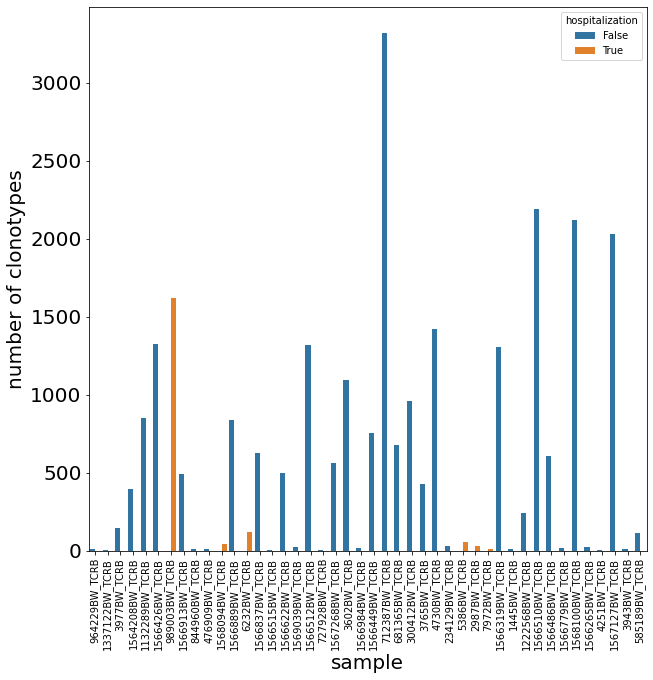

In [ ]:
ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(data=df_clonality_portion,x='sample',y='clonality_portion',hue='hospitalization')
ax.set_xlabel('sample',fontsize=20)
ax.set_ylabel('number of clonotypes',fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=20)

Clonality analysis 4.4 -  clonality portion violin plot per group
1.   x-axis and y-axis labels, figsize, fontsize are customizable
2.   change the violin plot (sns.violinplot) to the plot type that you are interested in, includes strip plot (sns.stripplot), swarm plot (sns.swarmplot), box plot (sns.boxplot), boxen plot (sns.boxenplot), point plot (sns.pointplot), and bar plot (sns.barplot)

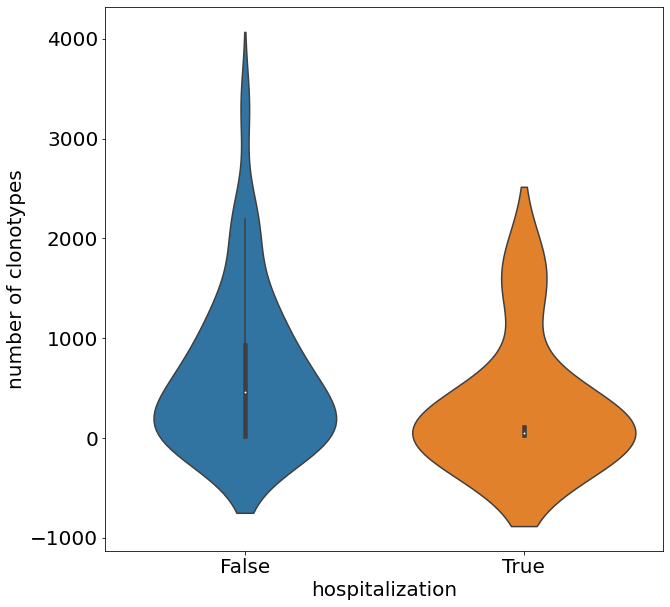

In [ ]:
ax = plt.subplots(figsize = (10,10))

ax = sns.violinplot(x='hospitalization',y='clonality_portion', data=df_clonality_portion)

ax.set_xlabel('hospitalization',fontsize=20)
ax.set_ylabel('number of clonotypes',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

Clonality analysis 5 - Relative abundance (in all clonotypes)

In [ ]:
#define clonotype groups based on frequency
def clonotype_group (row):
  if row['freq'] > 0.01 and row['freq'] <= 1:
    return 'Hyperexpanded'
  if row['freq'] > 0.001 and row['freq'] <= 0.01: 
    return 'Large'
  if row['freq'] > 0.0001 and row['freq'] <= 0.001:
    return 'Medium'
  if row['freq'] > 0.00001 and row['freq'] <= 0.0001:
    return 'Small'
  if row['freq'] > 0 and row['freq'] <= 0.00001:
    return 'Rare'

#apply the clonotype_group function to the dataframe
df['clonotype_group'] = df.apply (lambda row: clonotype_group(row),axis=1)

#calculate the relative abundance in each sample based on clonotype groups
df_relative_abundance= df.groupby(['sample','hospitalization','clonotype_group']).agg({'freq':'sum'}).reset_index().rename(columns={'':"relative_abundance"})
df_relative_abundance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,sample,hospitalization,clonotype_group,freq
0,1132289BW_TCRB,False,Large,0.014510
1,1132289BW_TCRB,False,Medium,0.048889
2,1132289BW_TCRB,False,Rare,0.635481
3,1132289BW_TCRB,False,Small,0.120081
4,1222568BW_TCRB,False,Large,0.042535
...,...,...,...,...
209,964229BW_TCRB,False,Small,0.104677
210,989003BW_TCRB,True,Large,0.024762
211,989003BW_TCRB,True,Medium,0.026716
212,989003BW_TCRB,True,Rare,0.667887


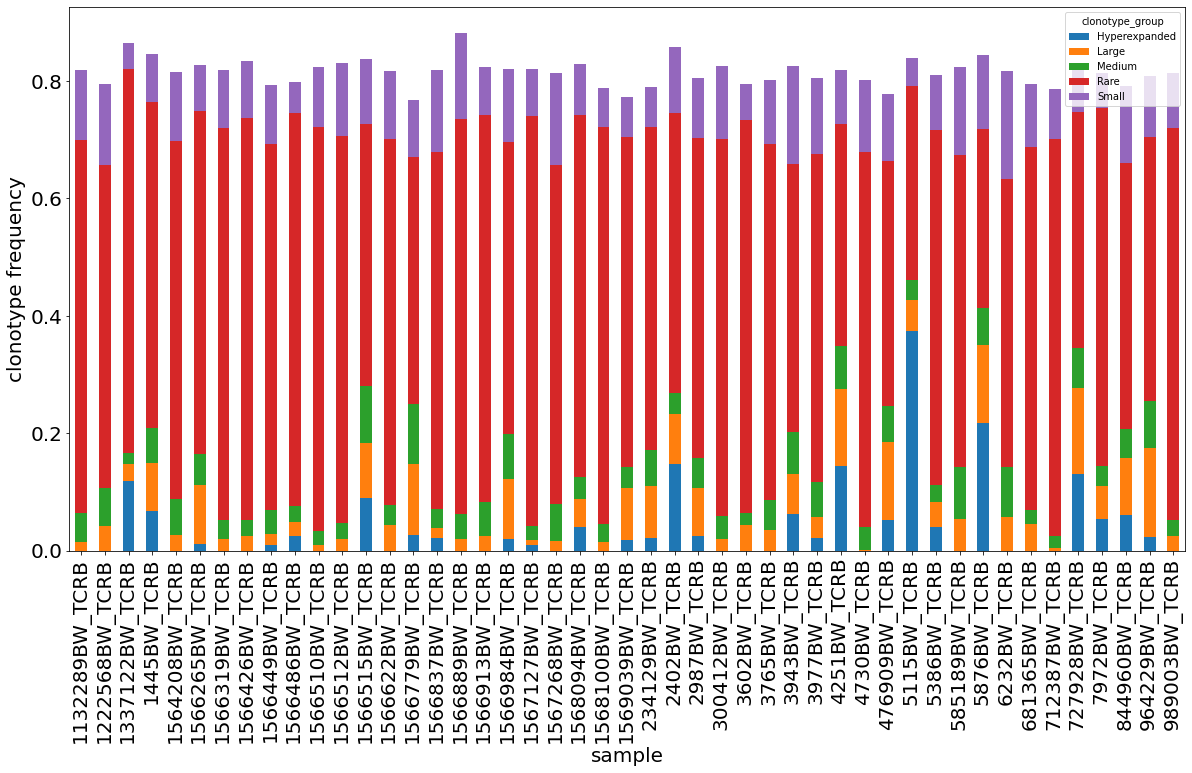

In [ ]:
ax = df_relative_abundance.groupby(['sample','clonotype_group'])['freq'].sum().unstack().plot(kind='bar', stacked=True)
ax.set_xlabel('sample',fontsize=20)
ax.set_ylabel('clonotype frequency',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

Clonality analysis 6 - Relative abundance in top clonotypes
1.   the top clonotypes are defined as top 100 clonotypes in the analysis below

In [ ]:
#define groups based on clone counts 
def reads_group_top (row):
  if row['#count'] > 1 and row['#count'] <= 10:
    return '1-10'
  if row['#count'] >= 11 and row['#count'] <= 100:
    return '11-100'
  if row['#count'] >= 101 and row['#count'] <= 1000:
    return '101-1000'
  if row['#count'] >= 1001 and row['#count'] <= 5000:
    return '1001-5000'

#get the top 100 clonotypes in each sample
df_top=df.sort_values(['sample', 'freq'], axis=0).groupby('sample').tail(100)

#apply the function to the dataframe
df_top['reads_group'] = df_top.apply (lambda row: reads_group_top(row),axis=1)

#show the result
df_top_result = df_top[['sample','hospitalization','reads_group']]
df_top_result

,sample,hospitalization,reads_group
13483113,1132289BW_TCRB,False,101-1000
13483114,1132289BW_TCRB,False,101-1000
13483112,1132289BW_TCRB,False,101-1000
13483111,1132289BW_TCRB,False,101-1000
13483110,1132289BW_TCRB,False,101-1000
...,...,...,...
437916,989003BW_TCRB,True,1001-5000
437915,989003BW_TCRB,True,1001-5000
437914,989003BW_TCRB,True,1001-5000
437913,989003BW_TCRB,True,1001-5000


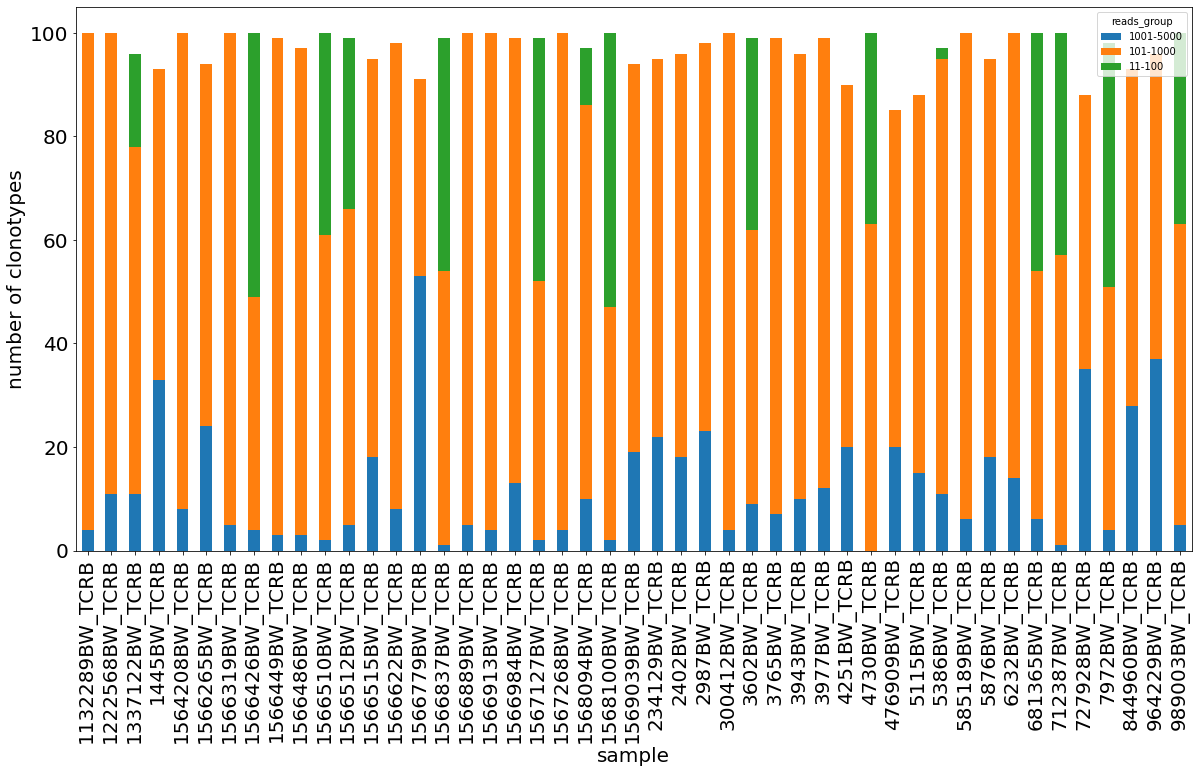

In [ ]:
ax = df_top.groupby(['sample', 'reads_group'])['#count'].count().unstack().plot(kind='bar', stacked=True)
ax.set_xlabel('sample',fontsize=20)
ax.set_ylabel('number of clonotypes',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

Clonality analysis 7 - Relative abundance in rare clonotypes
1.   the rare clonotypes are defined as rare 100 clonotypes in the analysis below

In [ ]:
#define groups based on clone counts 
def reads_group_rare (row):
  if row['#count'] == 1 :
    return '1'
  if row['#count'] >= 2 and row['#count'] <= 3:
    return '2-3'
  if row['#count'] >= 4 and row['#count'] <= 10:
    return '4-10'
  if row['#count'] >= 11 and row['#count'] <= 30:
    return '11-30'
  if row['#count'] >= 31 and row['#count'] <= 100:
    return '31-100'  
  if row['#count'] >= 101 and row['#count'] <= 200:
    return '101-200'

#get the rare 100 clonotypes
df_rare=df.sort_values(['sample', 'freq'], axis=0).groupby('sample').head(100)

#apply the functions to the dataframe
df_rare['reads_group'] = df_rare.apply (lambda row: reads_group_rare(row),axis=1)

#show the result
df_rare_result = df_rare[['sample','hospitalization','reads_group']]
df_rare_result

,sample,hospitalization,reads_group
13533460,1132289BW_TCRB,False,1
13533461,1132289BW_TCRB,False,1
13533462,1132289BW_TCRB,False,1
13533463,1132289BW_TCRB,False,1
13533464,1132289BW_TCRB,False,1
...,...,...,...
486385,989003BW_TCRB,True,1
486386,989003BW_TCRB,True,1
486387,989003BW_TCRB,True,1
486388,989003BW_TCRB,True,1


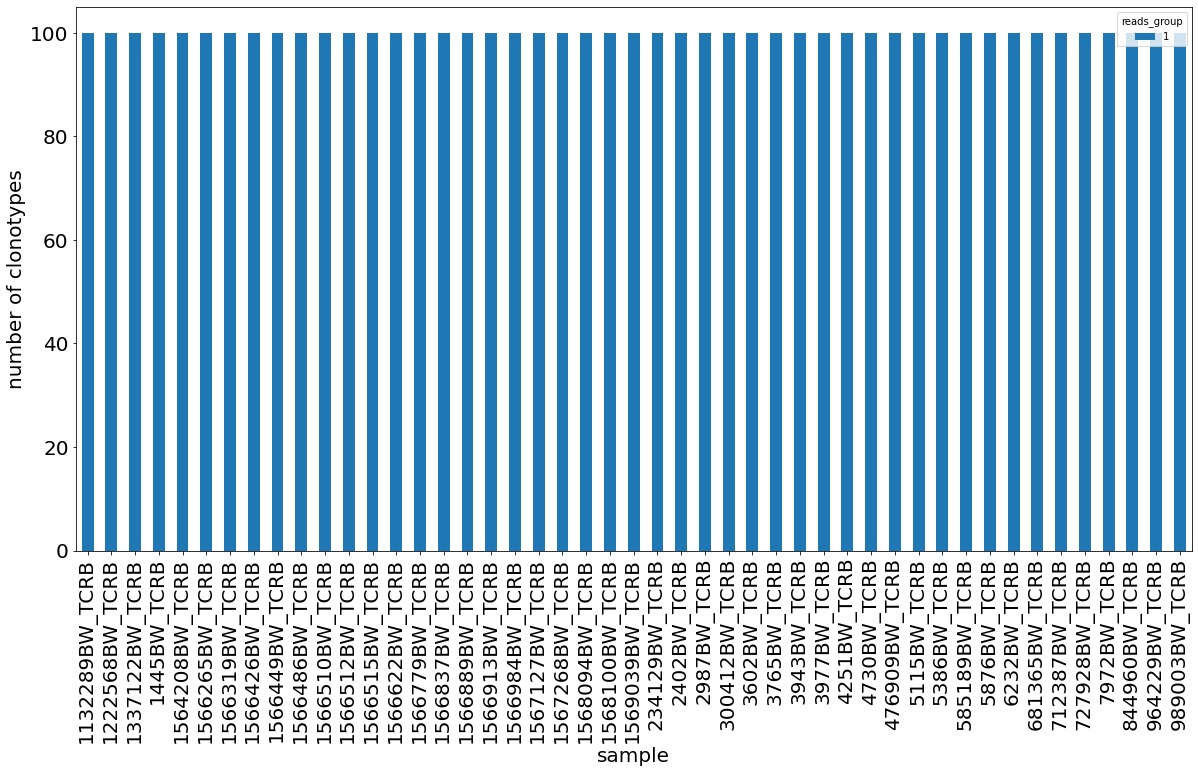

In [ ]:
ax = df_rare.groupby(['sample', 'reads_group'])['#count'].count().unstack().plot(kind='bar', stacked=True)
ax.set_xlabel('sample',fontsize=20)
ax.set_ylabel('number of clonotypes',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)